<a href="https://colab.research.google.com/github/Crane-YU/Advanced-Python/blob/master/multiple_classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [0]:
word_index = reuters.get_word_index()

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  
  return results

In [7]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
print("The shape of x_train is: ", x_train.shape)

# Our vectorized test data
x_test = vectorize_sequences(test_data)

The shape of x_train is:  (8982, 10000)


In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  
  for i, label in enumerate(labels):
    results[i, label] = 1.
  
  return results

In [0]:
# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)

# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models 
from keras import layers 

# create the model/layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',  loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
y_train = one_hot_train_labels[1000:]

history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 211us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 86us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 84us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

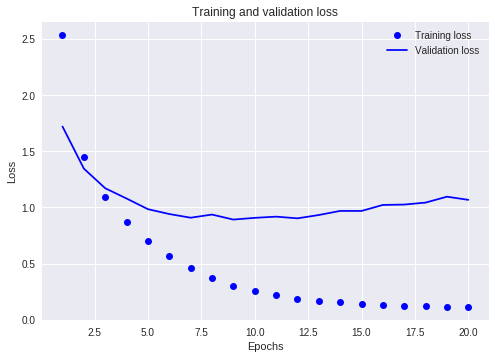

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
# recreate the model/layers and retrain the model from scratch
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',  loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/30
7982/7982 [==============================] - 2s 228us/step - loss: 1.5663 - acc: 0.6457 - val_loss: 1.1534 - val_acc: 0.7210
Epoch 2/30
7982/7982 [==============================] - 1s 173us/step - loss: 0.8779 - acc: 0.7952 - val_loss: 1.0161 - val_acc: 0.7640
Epoch 3/30
7982/7982 [==============================] - 1s 171us/step - loss: 0.5437 - acc: 0.8747 - val_loss: 0.9706 - val_acc: 0.7950
Epoch 4/30
7982/7982 [==============================] - 1s 173us/step - loss: 0.3590 - acc: 0.9127 - val_loss: 0.9728 - val_acc: 0.8150
Epoch 5/30
7982/7982 [==============================] - 1s 174us/step - loss: 0.2604 - acc: 0.9386 - val_loss: 1.0832 - val_acc: 0.8110
Epoch 6/30
7982/7982 [==============================] - 1s 176us/step - loss: 0.2148 - acc: 0.9490 - val_loss: 1.1723 - val_acc: 0.8000
Epoch 7/30
7982/7982 [==============================] - 1s 173us/step - loss: 0.1839 - acc: 0.9495 - val_loss: 1.2474 - val_acc: 0.8000


KeyboardInterrupt: ignored